In [1]:
import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('./datasets/combined_data_1.txt', header = None, names = ['Cust_Id', 'Rating','Date'], usecols = [0,1,2])

df['Rating'] = df['Rating'].astype(float)
df.head()

,Cust_Id,Rating,Date
0,1:,NaN,NaN
1,1488844,3.0,2005-09-06
2,822109,5.0,2005-05-13
3,885013,4.0,2005-10-19
4,30878,4.0,2005-12-26


In [3]:
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()

movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(df) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)


In [4]:
# remove those null Movie ID rows
df = df[pd.notnull(df['Rating'])]

df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
df.sample(5)

,Cust_Id,Rating,Date,Movie_Id
1814570,2414516,5.0,2005-07-22,334
6813324,1221877,4.0,2005-04-13,1324
5745800,869037,4.0,2003-09-13,1145
1768922,1237561,4.0,2005-10-15,331
23175943,1205948,3.0,2004-09-28,4355


In [5]:
# check
df.isnull().sum()

Cust_Id     0
Rating      0
Date        0
Movie_Id    0
dtype: int64

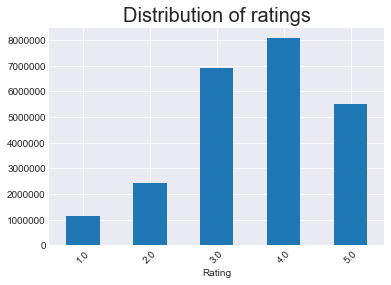

In [11]:
p = df.groupby('Rating')['Rating'].agg(['count'])


# get movie count
movie_count = df.isnull().sum()[1]

# get customer count
cust_count = df['Cust_Id'].nunique() - movie_count

# get rating count
rating_count = df['Cust_Id'].count() - movie_count


ax = p.plot(kind = 'bar', legend = False)
plt.title(('Distribution of ratings'), fontsize=20)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [12]:
data = df.groupby('Cust_Id')['Rating'].count().clip(upper=199)

(array([216228.,  82069.,  48034.,  31845.,  21341.,  16079.,  12483.,
          9150.,   7098.,  26431.]),
 array([  1. ,  20.8,  40.6,  60.4,  80.2, 100. , 119.8, 139.6, 159.4,
        179.2, 199. ]),
 <a list of 10 Patch objects>)

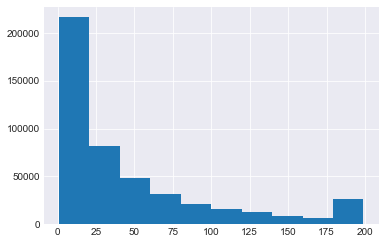

In [13]:
plt.hist(data)

In [6]:
# Filter sparse users
min_user_ratings = 200
filter_users = (df['Cust_Id'].value_counts()>min_user_ratings)
filter_users = filter_users[filter_users].index.tolist()

# Actual filtering
df_filterd = df[(df['Cust_Id'].isin(filter_users))]
del filter_users, min_user_ratings
print('Shape User-Ratings unfiltered:\t{}'.format(df.shape))
print('Shape User-Ratings filtered:\t{}'.format(df_filterd.shape))

Shape User-Ratings unfiltered:	(24053764, 4)
Shape User-Ratings filtered:	(6266968, 4)


In [7]:
unique = np.unique(df['Cust_Id'])

import random


sample_users = random.sample(range(len(unique)), 25000)
sample_users.sort()
users = [unique[i] for i in sample_users]

In [8]:
df1 = df.loc[df['Cust_Id'].isin(users)]


In [9]:
df1.shape

(1284242, 4)

In [14]:
df1.to_csv('Sample of ratings.csv')